<a href="https://colab.research.google.com/github/bhagu/1000-Days-Of-Code/blob/main/Preparing_Data_for_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparing Data For Machine Learning - Pluralsight Course

#Understanding the Need for Data Preparation

##Module Focus
Insufficient Data;
Excessive or overly complex data;
Non-representative data, missing data, outlier;
Oversampling and understanding;
Overfitting and underfitting models;

### Insufficient Data
Leads to Overfitting/ Underfitting

No great solution for insufficient data

Simply need to find more data sources

Dealing with Small Datasets

Model complexity - Simpler model with fewer model parameters, Less susceptible to overfitting, e.g. Naive Bayes classifier, logistic regression, Use ensemble techniques

Transfer learning - the practice of reusing a trained neural network that solves a problem similar to yours, usually leaving the network architeture unchanged and re-using some of all of the model weights

Data augmentation - Increase the number of training samples, Perturbed images are a form of data augmentation, Scaling, rotation, affine transforms, Makes CNN training more robust

Synthetic data - Artificially generate samples which mimic real world data


###Too Much Data
Data might be excessive in 2 ways

- Curse of dimensionality: Too many columns/features
- Outdated historical data: Too many rows

Concept Drift: The relationship between features (X-variables) and labels (Y-variables) changes over time; ML models fail to keep up, and consequently their performance suffers

Outdated historical data: If not eliminated, leads to concept drift;
This is a serious issue in specific applications
- Financial trading

Usually require human expert to judge which rows to leave out

Curse of dimensionality: 2 specific problems arise when too much data is available
- Deciding which data is actually relevant
- Aggregating very low-level data into useful features

Easier problem to solve:
- Feature selection: Deciding which data is actually relevant
- Feautre engineering: Aggregating very low-level data into useful features
- Dimensionality reduction: Reduce complexity without losing information

Concept Hierarchy: A mapping that combines very low-level features (e.g. latitudes and longitudes) into more general, usable features (e.g. zip codes)




###Non-Representative Data
Data is inaccurate, small errors have significant impact

Account for data cleaning and processing time

Data is not representative of the real world i.e. biased

Leads to biased models that perform poorly in practice

Mitigate using oversampling and undersampling

###Duplicate Data
If data can be flagged as duplicate, problem relatively easy to solve
- Simply de-duplicate

Can be hard to identify in some applications
- Real-time streaming

###Missing Data and Outliers
Data cleaning procedures can help significantly mitigate the effects of
- Missing data
- Outliers

Missing Data
- Deletion
- Imputation

Deletion / Listwise Deletion: Delete an entire record (row) if a single value (column) is missing. Simple, but can lead to bias

- Most common method in practices
- Can reduce sample size significanlty
- If values are not missing at random, can intriduce significant bias

Imputation: Fill in missing values, rather than deleting records with missing values. Missing values are inferred from known data.

- Methods range from very simple to very complex
- Simplest method - Use column average
- Can interpolate from nearby values 
- Can even build model to predict missing values

Univariate Imputation: rely only on known values in same feature

Multivariate imputation: Use all known data to infer missing value
- Construct regression models from other columns to predict this column
- Iteratively repeat for all columns

Hot-deck Imputation:
- Sort records based on any criteria
- for each missing value, use immediately prior available value
- "Last Observation Carried Forward"
- For time-series data, equivalent to assuming no change since last measurement

Mean Substitution:
- For each missing value, substitute mean of all available values
- Has effect of weakening correlations between columns
- Can be problematic when bivariate analysis is required

Regression:
- Fit model to predict missing column based on other column values
- Tends to strengthen correlations
- Regression and mean substitution have complementary strengths

Outliers
- Identifying Outliers
  - Distance from Mean
  - Distance from fitted line
- Coping with Outliers
  - Drop
  - Cap/Floor
  - Set to mean

Identifying Outliers

More than 3 Standard deviation - Distance from mean

Might also be data points that do not fit into the same relationship as the rest of the data


Coping with Outliers
- Always start by scrutinizing outliers
- If erroneous observation
  - Drop if all attributes of that point are erroneous
  - Set to mean if only one attribute is erroneous
- If genuine, legitimate outlier
  - Leave as-is if model is not distorted
  - Cap/Floor if model is distorted
    - Need to first standardize data
    - Cap positive outliers to +3
    - Floor negative outliers to -3

###Oversampling and Undersampling
Techniques that intentionally add bias to the data in order to make it balanced

Balacing Datasets
- Oversampling uncommon x or y values
- Undersampling of common x or y values

Forcibly Balanced Datasets

Oversampling and undersampling tend to
- Reduce accuracy
- Increase precision and recall

Related techniques include
- Case studies
- Stratified sampling

###Overfitting and Underfitting
Overfitting
- Model has memorized the training data
- Low training error
- Doesn't work well in the real world
- High test error

Underfitting
- Model unable to capture relationships in data
- Performs poorly on the training data
- Model too 'simple' to be useful

#Implementing Data Cleaning and Transformation

##Handling Missing Values

In [1]:
import sklearn

import pandas as pd
import numpy as np

import datetime

In [2]:
print(sklearn.__version__)

0.22.2.post1


In [3]:
print(np.__version__)

1.19.5


In [4]:
print(pd.__version__)

1.1.5


In [5]:
automobile_df = pd.read_csv("cars.csv")

automobile_df.head()

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
0,chevrolet chevelle malibu,18.0,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan",3.47,2.68,9
1,buick skylark 320,15.0,8,350,165,3693,11.5,1970,US],3.47,2.68,?
2,plymouth satellite,18.0,?,318,150,3436,11,"1970, 1976",US,2.68,3.47,9
3,amc rebel sst,16.0,8,304,150,3433,12,1970,US,3.19,3.40,10
4,ford torino,17.0,8,302,140,3449,10.5,1970-1972,US],3.19,3.40,8


In [6]:
automobile_df.columns

Index(['Model', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Year', 'Origin', 'bore', 'stroke',
       'compression-ratio'],
      dtype='object')

In [7]:
automobile_df.describe()

,MPG,Horsepower,bore,stroke
count,385.000000,394.000000,394.000000,394.000000
mean,23.551429,104.337563,3.305025,3.289289
std,7.821598,38.449600,0.270336,0.271165
min,9.000000,46.000000,2.540000,2.070000
25%,17.500000,75.000000,3.080000,3.150000
50%,23.000000,92.500000,3.270000,3.350000
75%,29.000000,125.000000,3.580000,3.400000
max,46.600000,230.000000,3.940000,4.170000


In [8]:
  automobile_df.shape

(394, 12)

In [9]:
automobile_df = automobile_df.replace('?', np.nan)

automobile_df.head()

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
0,chevrolet chevelle malibu,18.0,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan",3.47,2.68,9
1,buick skylark 320,15.0,8,350,165,3693,11.5,1970,US],3.47,2.68,NaN
2,plymouth satellite,18.0,NaN,318,150,3436,11,"1970, 1976",US,2.68,3.47,9
3,amc rebel sst,16.0,8,304,150,3433,12,1970,US,3.19,3.40,10
4,ford torino,17.0,8,302,140,3449,10.5,1970-1972,US],3.19,3.40,8


In [10]:
automobile_df.isna().sum()

Model                0
MPG                  9
Cylinders            2
Displacement         1
Horsepower           0
Weight               1
Acceleration         1
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    2
dtype: int64

In [11]:
automobile_df['MPG'] = automobile_df['MPG'].fillna(automobile_df['MPG'].mean())

automobile_df.isna().sum()

Model                0
MPG                  0
Cylinders            2
Displacement         1
Horsepower           0
Weight               1
Acceleration         1
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    2
dtype: int64

In [12]:
automobile_df = automobile_df.dropna()

In [13]:
 automobile_df.shape

(387, 12)

In [14]:
automobile_df.isna().sum()

Model                0
MPG                  0
Cylinders            0
Displacement         0
Horsepower           0
Weight               0
Acceleration         0
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    0
dtype: int64

In [15]:
automobile_df.isnull().sum()

Model                0
MPG                  0
Cylinders            0
Displacement         0
Horsepower           0
Weight               0
Acceleration         0
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    0
dtype: int64

In [16]:
automobile_df.sample(5)

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
285,mercury grand marquis,16.5,8,351,138,3955,13.2,1979,US,3.01,3.40,23
79,ford pinto (sw),22.0,4,122,86,2395,16,1972-73,US,3.03,3.39,7.6
122,toyota mark ii,20.0,6,156,122,2807,13.5,1973,Japan,2.97,3.23,9.4
289,chevrolet malibu classic (sw),19.2,8,267,125,3605,15,1979,US,3.27,3.35,9.2
165,toyota corolla,29.0,4,97,75,2171,16,1975,Japan,3.24,3.08,9.4


In [17]:
automobile_df.drop(['Model'], axis=1, inplace=True)

In [18]:
automobile_df.sample(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
23,26.0,4,121,113,2234,12.5,1970,Europe,3.03,3.39,7.6
128,26.0,4,122,80,2451,16.5,1974,US,3.74,2.90,9.5
202,32.0,4,85,70,1990,17,1976,Japan,3.58,2.87,8.8
87,14.0,8,302,137,4042,14.5,1973,US,3.17,3.46,7.5
337,23.5,6,173,110,2725,12.6,1981,US,3.15,3.58,9.1


In [19]:
automobile_df.drop(['bore', 'stroke', 'compression-ratio'], axis=1, inplace=True)

automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,18.000000,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan"
3,16.000000,8,304,150,3433,12,1970,US
4,17.000000,8,302,140,3449,10.5,1970-1972,US]
6,14.000000,8,454,220,4354,9,1970[1975],"US; Detroit, Michigan"
7,23.551429,8,440,215,4312,8.5,1970,US


##Cleaning Data

In [20]:
automobile_df['Year'].str.isnumeric().value_counts()

True     351
False     36
Name: Year, dtype: int64

In [21]:
automobile_df['Year'].loc[automobile_df['Year'].str.isnumeric() == False]

0          1970[1975]
4           1970-1972
6          1970[1975]
30      1971[1973]971
35         1971[1973]
40         1971[1973]
44         1971[1973]
49         1971[1973]
56         1972[1973]
61         1972[1973]
65         1972[1973]
68         1972[1973]
73         1972[1973]
75            1972-73
79            1972-73
82            1972-73
96          1973-1974
97         1973, 1974
102    1973, 19741973
105        1973, 1974
108        1973, 1974
112        1973, 1974
115        1973, 1974
126        1974, 1975
131        1974, 1975
134        1974, 1975
137        1974, 1975
139    1974, 19751974
142        1974, 1975
365         1982-1985
374         1982-1985
380         1982-1985
383         1982-1985
387         1982-1985
389         1982-1985
391         1982-1985
Name: Year, dtype: object

In [22]:
extr = automobile_df['Year'].str.extract(r'^(\d{4})', expand=False)

extr.head()

0    1970
3    1970
4    1970
6    1970
7    1970
Name: Year, dtype: object

In [23]:
automobile_df['Year'].isnull().values.any()

False

In [24]:
automobile_df['Year'] = pd.to_numeric(extr)
automobile_df['Year'].dtype

dtype('int64')

In [25]:
automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,18.000000,8,307,130,3504,12,1970,"US; Detroit, Michigan"
3,16.000000,8,304,150,3433,12,1970,US
4,17.000000,8,302,140,3449,10.5,1970,US]
6,14.000000,8,454,220,4354,9,1970,"US; Detroit, Michigan"
7,23.551429,8,440,215,4312,8.5,1970,US


In [26]:
automobile_df['Age'] = datetime.datetime.now().year - automobile_df['Year']

automobile_df.drop(['Year'], axis=1, inplace=True)

automobile_df.sample(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
152,15.0,6,250,72,3432,21,US,46
172,18.0,6,171,97,2984,14.5,US,46
342,32.3,4,97,67,2065,17.8,Japan,40
314,19.1,6,225,90,3381,18.7,US,41
392,28.0,4,120,79,2625,18.6,US,39


In [27]:
automobile_df.dtypes

MPG             float64
Cylinders        object
Displacement     object
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [28]:
automobile_df['Cylinders'].isnull().values.any()

False

In [29]:
automobile_df['Cylinders'].str.isnumeric().value_counts()

True     378
False      9
Name: Cylinders, dtype: int64

In [30]:
automobile_df['Cylinders'].loc[automobile_df['Cylinders'].str.isnumeric() == False]

11    -
22    -
32    -
42    -
51    -
58    -
69    -
82    -
89    -
Name: Cylinders, dtype: object

In [31]:
cylinders = automobile_df['Cylinders'].loc[automobile_df['Cylinders'] != '-']

cmean = cylinders.astype(int).mean()

In [32]:
cmean

5.420634920634921

In [33]:
automobile_df['Cylinders'] = automobile_df['Cylinders'].replace('-', cmean).astype(int)

In [34]:
automobile_df.dtypes

MPG             float64
Cylinders         int64
Displacement     object
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [35]:
automobile_df['Displacement'] = pd.to_numeric(automobile_df['Displacement'], errors='coerce')
automobile_df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [36]:
automobile_df['Weight'] = pd.to_numeric(automobile_df['Weight'], errors='coerce')
automobile_df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration     object
Origin           object
Age               int64
dtype: object

In [37]:
automobile_df['Acceleration'] = pd.to_numeric(automobile_df['Acceleration'], errors='coerce')
automobile_df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration    float64
Origin           object
Age               int64
dtype: object

In [38]:
automobile_df['Origin'].head(15)

0     US; Detroit, Michigan
3                        US
4                       US]
6     US; Detroit, Michigan
7                        US
8                        US
9                       US]
10                       US
11                       US
12    US; Detroit, Michigan
13                       US
14             Japan; Aichi
15                       US
16                      US]
17                       US
Name: Origin, dtype: object

In [39]:
automobile_df['Origin'].unique()

array(['US; Detroit, Michigan', 'US', 'US]', 'Japan; Aichi',
       'Europe-Germany', 'Europe', 'Japan; Tokyo', 'Japan; Aichi]',
       'US; Detroit, Michigan]', 'Japan; Tokyo]', 'Japan',
       'Europe Germany'], dtype=object)

In [40]:
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('US'),
                                   'US',
                                   automobile_df['Origin'])

automobile_df['Origin'].unique()

array(['US', 'Japan; Aichi', 'Europe-Germany', 'Europe', 'Japan; Tokyo',
       'Japan; Aichi]', 'Japan; Tokyo]', 'Japan', 'Europe Germany'],
      dtype=object)

In [41]:
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('Japan'),
                                   'Japan',
                                   automobile_df['Origin'])

automobile_df['Origin'].unique()

array(['US', 'Japan', 'Europe-Germany', 'Europe', 'Europe Germany'],
      dtype=object)

In [42]:
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('Europe'),
                                   'Europe',
                                   automobile_df['Origin'])

automobile_df['Origin'].unique()

array(['US', 'Japan', 'Europe'], dtype=object)

In [43]:
automobile_df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,23.672514,5.410853,192.184755,103.645995,2965.387597,15.573643,44.917313
std,7.736579,1.667795,103.703706,38.128651,846.332848,2.746260,3.668715
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,39.000000
25%,17.600000,4.000000,102.500000,75.000000,2221.500000,13.900000,42.000000
50%,23.200000,4.000000,146.000000,92.000000,2790.000000,15.500000,45.000000
75%,29.000000,6.000000,260.000000,121.000000,3589.500000,17.050000,48.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,51.000000


In [44]:
automobile_df.to_csv('cars_processed.csv', index=False)

In [45]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Miles per gallon')

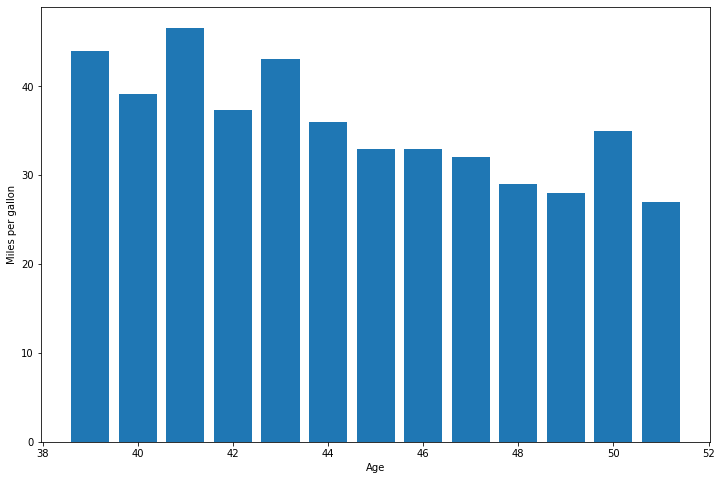

In [46]:
plt.figure(figsize=(12,8))

plt.bar(automobile_df['Age'], automobile_df['MPG'])

plt.xlabel('Age')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

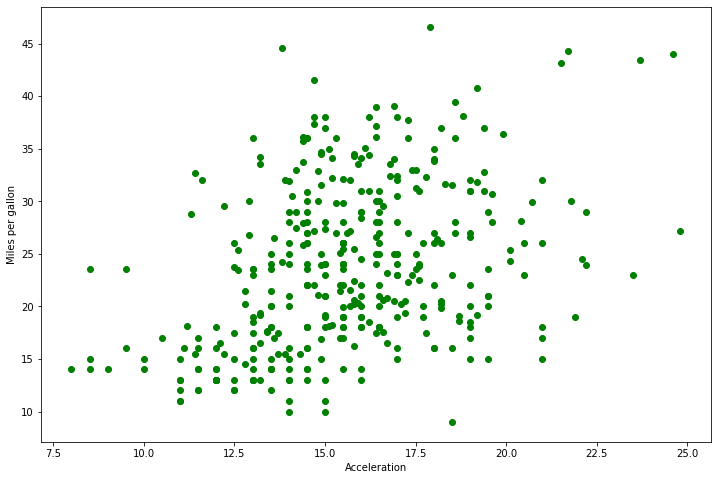

In [47]:
plt.figure(figsize=(12,8))

plt.scatter(automobile_df['Acceleration'], automobile_df['MPG'], color='g')

plt.xlabel('Acceleration')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

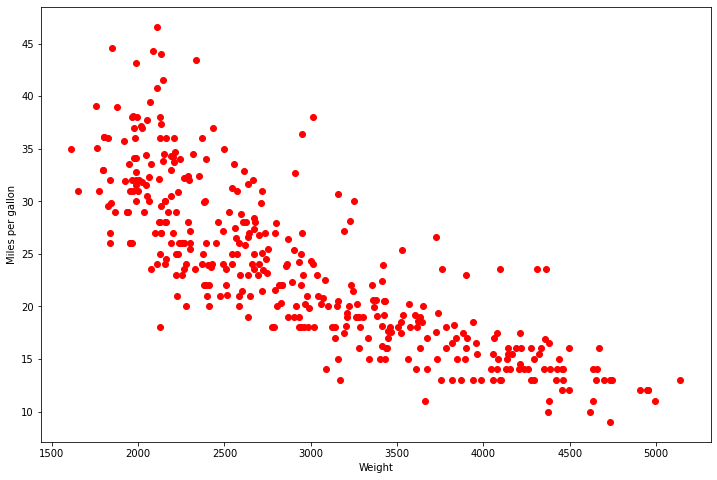

In [48]:
 plt.figure(figsize=(12,8))

plt.scatter(automobile_df['Weight'], automobile_df['MPG'], color='r')

plt.xlabel('Weight')
plt.ylabel('Miles per gallon')

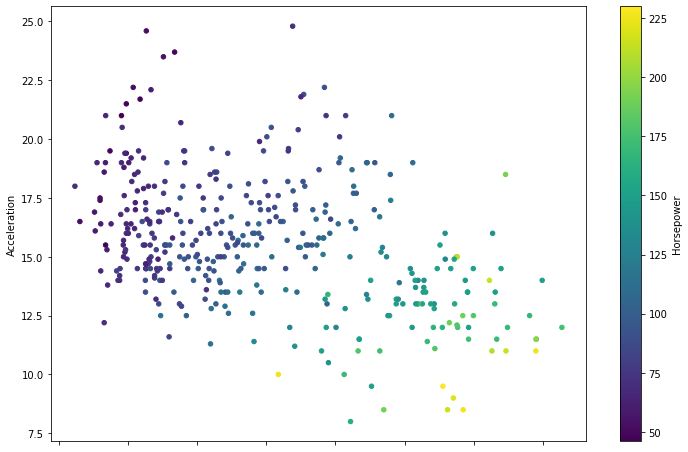

In [49]:
automobile_df.plot.scatter(x='Weight',
                           y='Acceleration',
                           c='Horsepower',
                           colormap='viridis',
                           figsize=(12,8));

Text(0, 0.5, 'Miles per gallon')

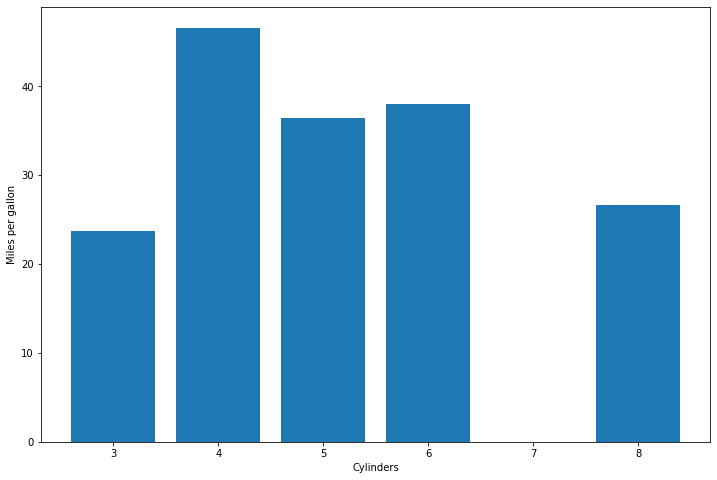

In [50]:
plt.figure(figsize=(12,8))

plt.bar(automobile_df['Cylinders'], automobile_df['MPG'])

plt.xlabel('Cylinders')
plt.ylabel('Miles per gallon')

In [51]:
automobile_df.drop(['Cylinders', 'Origin'], axis=1, inplace=True)

automobile_df.sample(10)

,MPG,Displacement,Horsepower,Weight,Acceleration,Age
54,27.0,97.0,60,1834,19.0,50
44,18.0,258.0,110,2962,13.5,50
206,13.0,318.0,150,3940,13.2,45
376,36.0,120.0,88,2160,14.5,39
138,14.0,304.0,150,4257,15.5,47
215,30.0,111.0,80,2155,14.8,44
4,17.0,302.0,140,3449,10.5,51
150,19.0,225.0,95,3264,16.0,46
374,38.0,105.0,63,2125,14.7,39
362,17.6,225.0,85,3465,16.6,40


In [52]:
cars_corr = automobile_df.corr()

cars_corr

,MPG,Displacement,Horsepower,Weight,Acceleration,Age
MPG,1.000000,-0.788492,-0.761499,-0.820138,0.392186,-0.566242
Displacement,-0.788492,1.000000,0.894199,0.932822,-0.526901,0.357047
Horsepower,-0.761499,0.894199,1.000000,0.863388,-0.670920,0.404458
Weight,-0.820138,0.932822,0.863388,1.000000,-0.397181,0.299049
Acceleration,0.392186,-0.526901,-0.670920,-0.397181,1.000000,-0.292705
Age,-0.566242,0.357047,0.404458,0.299049,-0.292705,1.000000


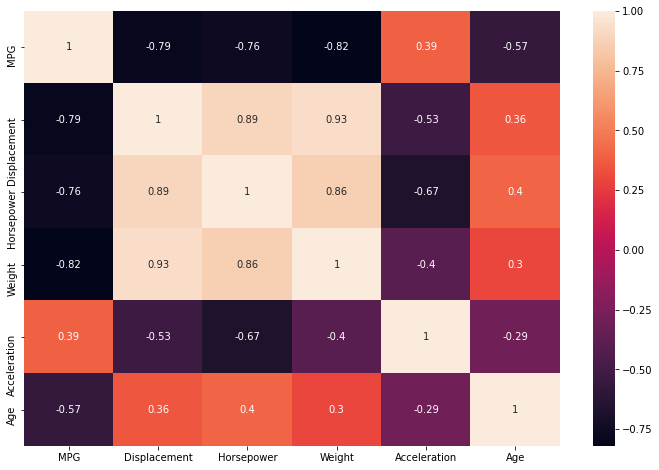

In [53]:
import seaborn as sns

fig, ax =plt.subplots(figsize = (12,8))

sns.heatmap(cars_corr, annot=True)

#Baseline Regression Model

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
automobile_df = pd.read_csv('cars_processed.csv')

automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307.0,130,3504,12.0,US,51
1,16.000000,8,304.0,150,3433,12.0,US,51
2,17.000000,8,302.0,140,3449,10.5,US,51
3,14.000000,8,454.0,220,4354,9.0,US,51
4,23.551429,8,440.0,215,4312,8.5,US,51


In [56]:
automobile_df.shape

(387, 8)

In [57]:
automobile_df.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Origin', 'Age'],
      dtype='object')

In [58]:
automobile_df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,23.672514,5.410853,192.184755,103.645995,2965.387597,15.573643,44.917313
std,7.736579,1.667795,103.703706,38.128651,846.332848,2.746260,3.668715
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,39.000000
25%,17.600000,4.000000,102.500000,75.000000,2221.500000,13.900000,42.000000
50%,23.200000,4.000000,146.000000,92.000000,2790.000000,15.500000,45.000000
75%,29.000000,6.000000,260.000000,121.000000,3589.500000,17.050000,48.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,51.000000


In [59]:
automobile_df.corr()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
MPG,1.000000,-0.746023,-0.788492,-0.761499,-0.820138,0.392186,-0.566242
Cylinders,-0.746023,1.000000,0.922633,0.811466,0.873029,-0.458161,0.321850
Displacement,-0.788492,0.922633,1.000000,0.894199,0.932822,-0.526901,0.357047
Horsepower,-0.761499,0.811466,0.894199,1.000000,0.863388,-0.670920,0.404458
Weight,-0.820138,0.873029,0.932822,0.863388,1.000000,-0.397181,0.299049
Acceleration,0.392186,-0.458161,-0.526901,-0.670920,-0.397181,1.000000,-0.292705
Age,-0.566242,0.321850,0.357047,0.404458,0.299049,-0.292705,1.000000


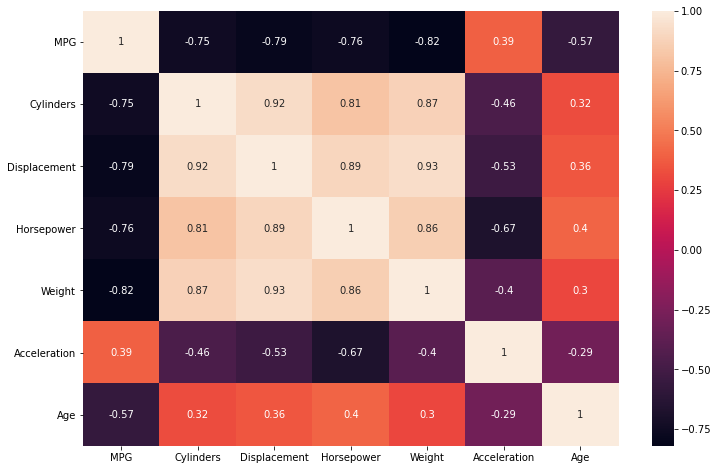

In [60]:
import seaborn as sns

fig, axs = plt.subplots(figsize = (12,8))

sns.heatmap(automobile_df.corr(), annot=True)

In [61]:
automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307.0,130,3504,12.0,US,51
1,16.000000,8,304.0,150,3433,12.0,US,51
2,17.000000,8,302.0,140,3449,10.5,US,51
3,14.000000,8,454.0,220,4354,9.0,US,51
4,23.551429,8,440.0,215,4312,8.5,US,51


In [62]:
X = automobile_df[['Age']]
Y = automobile_df['MPG']

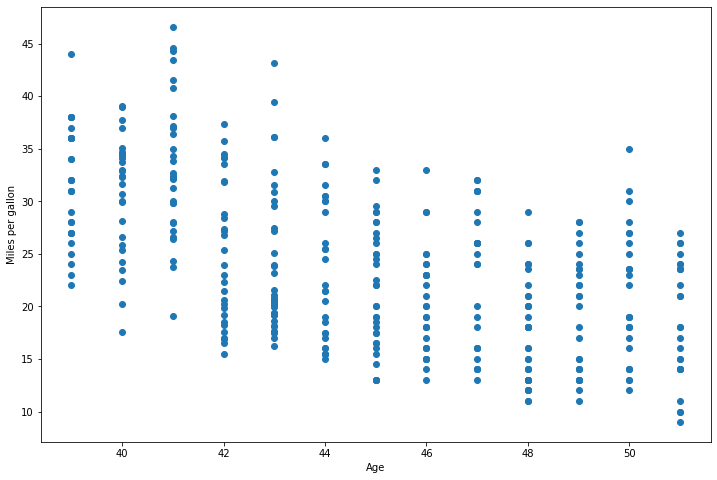

In [63]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(automobile_df['Age'], automobile_df['MPG'])

plt.xlabel('Age')
plt.ylabel('Miles per gallon')

plt.show()

In [64]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [65]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [66]:
print("Training score: ", linear_model.score(x_train, y_train))

Training score:  0.3260230937110572


In [67]:
y_pred = linear_model.predict(x_test)

In [68]:
from sklearn.metrics import r2_score

print("Testing score: ", r2_score(y_test, y_pred))

Testing score:  0.3013959748922521


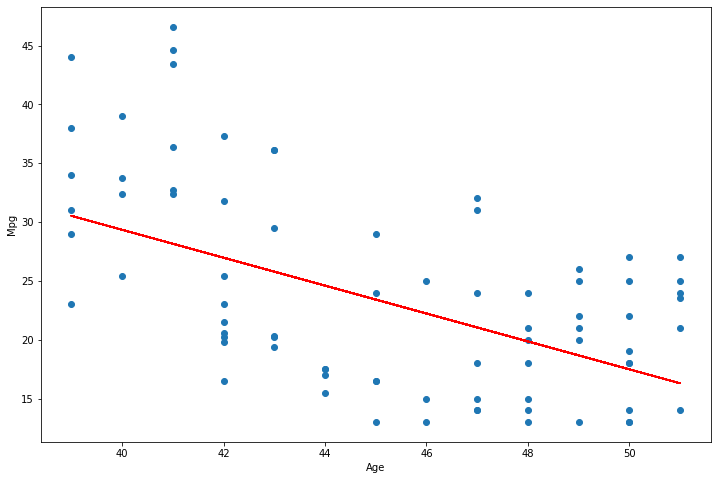

In [69]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Age')
plt.ylabel('Mpg')
plt.show()

In [70]:
X = automobile_df[['Horsepower']]
Y = automobile_df['MPG']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

print("Training score: ", linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

print("Testing score: ", r2_score(y_test, y_pred))

Training score:  0.5759590354847877
Testing score:  0.5820152983246247


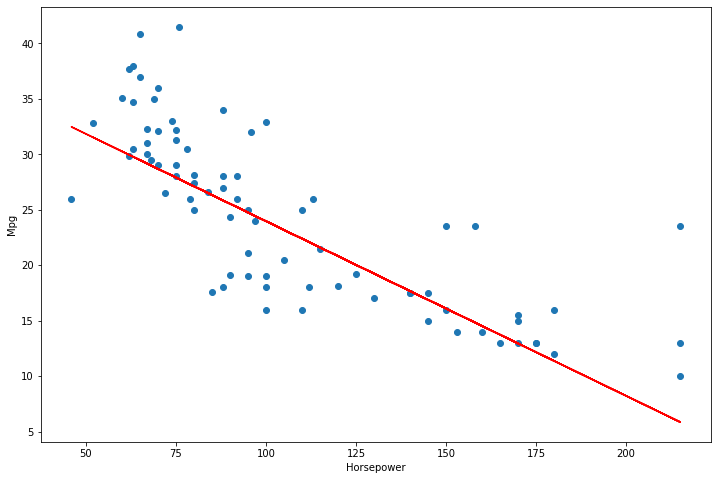

In [71]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Horsepower')
plt.ylabel('Mpg')
plt.show()

In [72]:
automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307.0,130,3504,12.0,US,51
1,16.000000,8,304.0,150,3433,12.0,US,51
2,17.000000,8,302.0,140,3449,10.5,US,51
3,14.000000,8,454.0,220,4354,9.0,US,51
4,23.551429,8,440.0,215,4312,8.5,US,51


In [73]:
automobile_df = pd.get_dummies(automobile_df, columns=['Origin'])

automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age,Origin_Europe,Origin_Japan,Origin_US
0,18.000000,8,307.0,130,3504,12.0,51,0,0,1
1,16.000000,8,304.0,150,3433,12.0,51,0,0,1
2,17.000000,8,302.0,140,3449,10.5,51,0,0,1
3,14.000000,8,454.0,220,4354,9.0,51,0,0,1
4,23.551429,8,440.0,215,4312,8.5,51,0,0,1


In [74]:
automobile_df.shape

(387, 10)

In [75]:
X = automobile_df.drop('MPG', axis=1)
Y = automobile_df['MPG']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

print("Training score: ", linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

print("Testing score: ", r2_score(y_test, y_pred))

Training score:  0.8020440304542542
Testing score:  0.7907326935286206


#Univariate Feature Imputation

In [76]:
import pandas as pd
import numpy as np

In [77]:
diabetes = pd.read_csv('diabetes.csv')

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [78]:
diabetes.shape

(768, 9)

In [79]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [80]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [81]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [82]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [83]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [84]:
diabetes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [85]:
diabetes['Glucose'].replace(0, np.nan, inplace=True)
diabetes['BloodPressure'].replace(0, np.nan, inplace=True)
diabetes['SkinThickness'].replace(0, np.nan, inplace=True)
diabetes['Insulin'].replace(0, np.nan, inplace=True)
diabetes['BMI'].replace(0, np.nan, inplace=True)

In [86]:
diabetes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [87]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [88]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [89]:
arr = diabetes['SkinThickness'].values.reshape(-1,1)

arr.shape

(768, 1)

In [90]:
from sklearn.impute import SimpleImputer

In [91]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imp.fit(diabetes['SkinThickness'].values.reshape(-1,1))

diabetes['SkinThickness'] = imp.transform(diabetes['SkinThickness'].values.reshape(-1,1))

In [92]:
diabetes['SkinThickness'].describe()

count    768.000000
mean      29.994792
std        8.886506
min        7.000000
25%       25.000000
50%       32.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [93]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [94]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(diabetes['Glucose'].values.reshape(-1,1))

diabetes['Glucose'] = imp.transform(diabetes['Glucose'].values.reshape(-1,1))

In [95]:
diabetes['Glucose'].describe()

count    768.000000
mean     121.656250
std       30.438286
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [96]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [97]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

imp.fit(diabetes['BloodPressure'].values.reshape(-1,1))

diabetes['BloodPressure'] = imp.transform(diabetes['BloodPressure'].values.reshape(-1,1))

In [98]:
diabetes['BloodPressure'].describe()

count    768.000000
mean      72.405184
std       12.096346
min       24.000000
25%       64.000000
50%       72.202592
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [99]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [100]:
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=32)

imp.fit(diabetes['BMI'].values.reshape(-1,1))

diabetes['BMI'] = imp.transform(diabetes['BMI'].values.reshape(-1,1))

In [101]:
diabetes['BMI'].describe()

count    768.000000
mean      32.450911
std        6.875366
min       18.200000
25%       27.500000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [102]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [103]:
diabetes.to_csv('diabetes_processed_incomplete.csv', index=False)

!ls

cars.csv	    diabetes.csv		       sample_data
cars_processed.csv  diabetes_processed_incomplete.csv


#Multivariate Feature Imputation

In [104]:
import pandas as pd
import numpy as np

In [105]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [106]:
imp = IterativeImputer(max_iter=100, random_state=0)

In [107]:
features = [[4, 2, 1],
            [24, 12, 6],
            [8, np.nan, 2],
            [28, 14, 7],
            [32, 16, np.nan],
            [600, 300, 150],
            [np.nan, 60, 30],
            [np.nan, np.nan, 1]]

In [108]:
imp.fit(features)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=100, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [109]:
imp.transform(features)

array([[  4.        ,   2.        ,   1.        ],
       [ 24.        ,  12.        ,   6.        ],
       [  8.        ,   3.99965998,   2.        ],
       [ 28.        ,  14.        ,   7.        ],
       [ 32.        ,  16.        ,   7.92735309],
       [600.        , 300.        , 150.        ],
       [120.00314828,  60.        ,  30.        ],
       [  5.58961596,   2.79614861,   1.        ]])

In [110]:
X_test = [[np.nan, 24, 12],
          [36, np.nan, np.nan],
          [100, np.nan, 25],
          [np.nan, 6, 3],
          [np.nan, 8, np.nan]]

In [111]:
imp.transform(X_test)

array([[ 48.00364632,  24.        ,  12.        ],
       [ 36.        ,  17.99997414,   8.92708811],
       [100.        ,  49.99967878,  25.        ],
       [ 12.00389534,   6.        ,   3.        ],
       [ 16.12053691,   8.        ,   5.86176343]])

In [112]:
diabetes = pd.read_csv('diabetes_processed_incomplete.csv')

diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.000000,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.000000,32.0,NaN,23.3,0.672,32,1
3,1,89.0,66.000000,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.000000,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.000000,32.0,NaN,25.6,0.201,30,0
6,3,78.0,50.000000,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.405184,32.0,NaN,35.3,0.134,29,0
8,2,197.0,70.000000,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.000000,32.0,NaN,32.0,0.232,54,1


In [113]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [114]:
diabetes_features = diabetes.drop('Outcome', axis=1)
diabetes_label = diabetes[['Outcome']]

diabetes_features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8,183.0,64.0,32.0,NaN,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [115]:
imp = IterativeImputer(max_iter=10000, random_state=0)

In [116]:
imp.fit(diabetes_features)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10000, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [117]:
diabetes_feature_arr = imp.transform(diabetes_features)

In [118]:
diabetes_feature_arr.shape

(768, 8)

In [119]:
diabetes_features = pd.DataFrame(diabetes_feature_arr, columns=diabetes_features.columns)

diabetes_features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,219.028414,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,70.341550,26.6,0.351,31.0
2,8.0,183.0,64.0,32.0,270.573172,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0


In [120]:
diabetes = pd.concat([diabetes_features, diabetes_label], axis=1)

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,219.028414,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,70.341550,26.6,0.351,31.0,0
2,8.0,183.0,64.0,32.0,270.573172,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1


In [121]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [122]:
diabetes.to_csv('diabetes_processed.csv', index=False)

!ls

cars.csv	    diabetes.csv	    diabetes_processed_incomplete.csv
cars_processed.csv  diabetes_processed.csv  sample_data


#Missing Indicator

In [123]:
import pandas as pd
import numpy as np

from sklearn.impute import MissingIndicator

In [124]:
features = [[4, 2, 1],
            [24, 12, 6],
            [8, 4, 2],
            [28, 14, 7],
            [32, 16, -1],
            [600, 300, 150],
            [-1, 60, 30],
            [-1, 4, 1]]

In [125]:
indicator = MissingIndicator(missing_values=-1)

In [126]:
mask_missing_values_only = indicator.fit_transform(features)

mask_missing_values_only

array([[False, False],
       [False, False],
       [False, False],
       [False, False],
       [False,  True],
       [False, False],
       [ True, False],
       [ True, False]])

In [127]:
indicator.features_

array([0, 2])

In [128]:
indicator = MissingIndicator(missing_values=-1, features="all")

In [129]:
mask_all = indicator.fit_transform(features)

mask_all

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False,  True],
       [False, False, False],
       [ True, False, False],
       [ True, False, False]])

In [130]:
indicator.features_

array([0, 1, 2])

#Feature Imputation Pipeline

In [131]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer

In [132]:
diabetes = pd.read_csv('diabetes_processed.csv')

diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.000000,35.0,219.028414,33.6,0.627,50.0,1
1,1.0,85.0,66.000000,29.0,70.341550,26.6,0.351,31.0,0
2,8.0,183.0,64.000000,32.0,270.573172,23.3,0.672,32.0,1
3,1.0,89.0,66.000000,23.0,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.000000,35.0,168.000000,43.1,2.288,33.0,1
5,5.0,116.0,74.000000,32.0,127.840221,25.6,0.201,30.0,0
6,3.0,78.0,50.000000,32.0,88.000000,31.0,0.248,26.0,1
7,10.0,115.0,72.405184,32.0,136.570245,35.3,0.134,29.0,0
8,2.0,197.0,70.000000,45.0,543.000000,30.5,0.158,53.0,1
9,8.0,125.0,96.000000,32.0,155.571480,32.0,0.232,54.0,1


In [133]:
diabetes_features = diabetes.drop('Outcome', axis=1)
diabetes_label = diabetes[['Outcome']]

diabetes_features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,219.028414,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,70.341550,26.6,0.351,31.0
2,8.0,183.0,64.0,32.0,270.573172,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0


In [134]:
mask = np.random.randint(0, 100, size=diabetes_features.shape).astype(np.bool)

mask = np.logical_not(mask)

In [135]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [136]:
diabetes_features[mask] = np.nan

diabetes_features.sample(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
535,4.0,132.0,72.405184,32.0,170.416899,32.9,0.302,23.0
573,2.0,98.0,60.000000,17.0,120.000000,34.7,0.198,22.0
453,2.0,119.0,72.405184,32.0,150.462909,19.6,0.832,72.0
101,1.0,151.0,60.000000,32.0,208.691263,26.1,0.179,22.0
495,6.0,166.0,74.000000,32.0,253.534811,26.6,0.304,66.0
341,1.0,95.0,74.000000,21.0,73.000000,25.9,0.673,36.0
9,8.0,125.0,96.000000,32.0,155.571480,32.0,0.232,54.0
428,0.0,135.0,94.000000,46.0,145.000000,40.6,0.284,26.0
756,7.0,137.0,90.000000,41.0,179.156780,32.0,0.391,39.0
63,2.0,141.0,58.000000,34.0,128.000000,25.4,0.699,24.0


In [137]:
diabetes_features.isnull().sum()

Pregnancies                  9
Glucose                     11
BloodPressure               11
SkinThickness               10
Insulin                      8
BMI                          8
DiabetesPedigreeFunction    12
Age                         14
dtype: int64

In [138]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [139]:
x_train, x_test, y_train, y_test = train_test_split(diabetes_features, diabetes_label, test_size=0.2)

In [140]:
transformer = ColumnTransformer(
    transformers=[('features', SimpleImputer(strategy='mean'), [0, 1, 2, 3, 4, 5, 6, 7])]
)

In [141]:
clf = make_pipeline(transformer, DecisionTreeClassifier(max_depth=4))

In [142]:
clf = clf.fit(x_train, y_train)

clf.score(x_train, y_train)

0.8045602605863192

In [143]:
y_pred = clf.predict(x_test)

In [144]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.6948051948051948

#Transforming Continuous and Categorical Data

##Feature Scaling


*   Scaling: Numeric values are shifted and rescaled so all features have the same scale. i.e. within the same minimum and maximum values
*   Standardization: Centers data around the mean and divides each value by the standard deviation so all features have 0 mean and unit variance


##Feature Scaling and Transformation

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [146]:
np.set_printoptions(precision=3)

In [147]:
diabetes = pd.read_csv('diabetes_processed.csv')

diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.000000,35.0,219.028414,33.6,0.627,50.0,1
1,1.0,85.0,66.000000,29.0,70.341550,26.6,0.351,31.0,0
2,8.0,183.0,64.000000,32.0,270.573172,23.3,0.672,32.0,1
3,1.0,89.0,66.000000,23.0,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.000000,35.0,168.000000,43.1,2.288,33.0,1
5,5.0,116.0,74.000000,32.0,127.840221,25.6,0.201,30.0,0
6,3.0,78.0,50.000000,32.0,88.000000,31.0,0.248,26.0,1
7,10.0,115.0,72.405184,32.0,136.570245,35.3,0.134,29.0,0
8,2.0,197.0,70.000000,45.0,543.000000,30.5,0.158,53.0,1
9,8.0,125.0,96.000000,32.0,155.571480,32.0,0.232,54.0,1


In [148]:
features_df = diabetes.drop('Outcome', axis=1)
target_df = diabetes['Outcome']

features_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,219.028414,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,70.341550,26.6,0.351,31.0
2,8.0,183.0,64.0,32.0,270.573172,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0


In [149]:
features_df.shape

(768, 8)

In [150]:
features_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.405184,29.994792,152.815064,32.450911,0.471876,33.240885
std,3.369578,30.438286,12.096346,8.886506,97.206638,6.875366,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,-16.568152,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,89.976015,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.202592,32.000000,131.100779,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,189.857469,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [151]:
from sklearn.preprocessing import MinMaxScaler

In [152]:
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(features_df)

In [153]:
rescaled_features.shape

(768, 8)

In [154]:
rescaled_features[1:5]

array([[0.059, 0.265, 0.429, 0.239, 0.101, 0.172, 0.117, 0.167],
       [0.471, 0.897, 0.408, 0.272, 0.333, 0.104, 0.254, 0.183],
       [0.059, 0.29 , 0.429, 0.174, 0.128, 0.202, 0.038, 0.   ],
       [0.   , 0.6  , 0.163, 0.304, 0.214, 0.509, 0.944, 0.2  ]])

In [155]:
rescaled_features_df = pd.DataFrame(rescaled_features, columns=features_df.columns)

rescaled_features_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501008,0.493930,0.249943,0.196371,0.291430,0.168179,0.204015
std,0.198210,0.196376,0.123432,0.096592,0.112694,0.140601,0.141473,0.196004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.123520,0.190184,0.070773,0.050000
50%,0.176471,0.470968,0.491863,0.271739,0.171197,0.282209,0.125747,0.133333
75%,0.352941,0.620968,0.571429,0.271739,0.239315,0.376278,0.234095,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


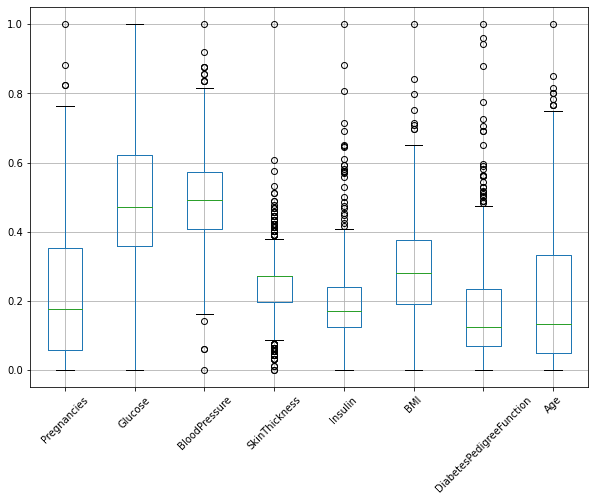

In [156]:
rescaled_features_df.boxplot(figsize=(10, 7), rot=45)

plt.show()

In [157]:
from sklearn.preprocessing import StandardScaler

In [158]:
scaler = StandardScaler()

scaler = scaler.fit(features_df)

standardized_features = scaler.transform(features_df)

In [159]:
type(standardized_features)

numpy.ndarray

In [160]:
standardized_features.shape

(768, 8)

In [161]:
standardized_features[0:5]

array([[ 0.64 ,  0.866, -0.034,  0.564,  0.682,  0.167,  0.468,  1.426],
       [-0.845, -1.205, -0.53 , -0.112, -0.849, -0.852, -0.365, -0.191],
       [ 1.234,  2.017, -0.695,  0.226,  1.212, -1.332,  0.604, -0.106],
       [-0.845, -1.074, -0.53 , -0.788, -0.605, -0.633, -0.921, -1.042],
       [-1.142,  0.504, -2.681,  0.564,  0.156,  1.55 ,  5.485, -0.02 ]])

In [162]:
standardized_features_df = pd.DataFrame(standardized_features, columns=features_df.columns)

standardized_features_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,7.661695e-18,-4.474864e-16,3.850725e-17,-3.048777e-16,4.803738e-16,2.491497e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.552931e+00,-4.004245e+00,-2.589294e+00,-1.743642e+00,-2.074100e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-7.201630e-01,-6.953060e-01,-5.624310e-01,-6.468694e-01,-7.205635e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.530732e-01,-1.675912e-02,2.257935e-01,-2.235283e-01,-6.562636e-02,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.112653e-01,6.282695e-01,2.257935e-01,3.813170e-01,6.038649e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.542658e+00,4.102655e+00,7.770228e+00,7.135692e+00,5.042883e+00,5.883565e+00,4.063716e+00


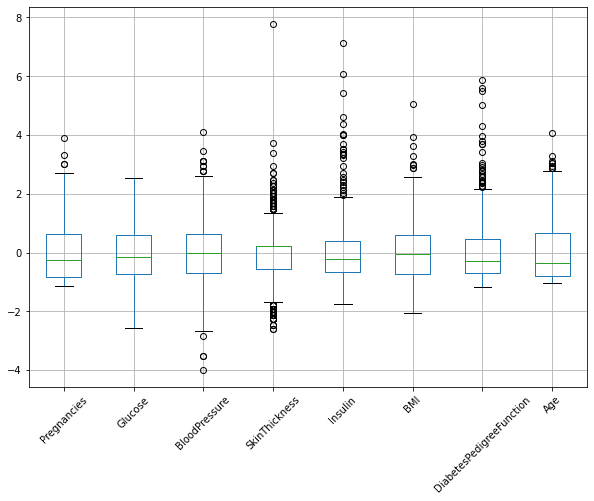

In [163]:
standardized_features_df.boxplot(figsize=(10,7), rot=45)
plt.show()

In [164]:
from sklearn.preprocessing import Normalizer

In [165]:
normalizer = Normalizer(norm='l1')

normalized_features = normalizer.fit_transform(features_df)

In [166]:
l1_normalized_features_df = pd.DataFrame(normalized_features, columns=features_df.columns)

In [167]:
l1_normalized_features_df.iloc[0]

Pregnancies                 0.010633
Glucose                     0.262293
BloodPressure               0.127602
SkinThickness               0.062029
Insulin                     0.388172
BMI                         0.059548
DiabetesPedigreeFunction    0.001111
Age                         0.088612
Name: 0, dtype: float64

In [168]:
l1_normalized_features_df[0:1].transpose()

,0
Pregnancies,0.010633
Glucose,0.262293
BloodPressure,0.127602
SkinThickness,0.062029
Insulin,0.388172
BMI,0.059548
DiabetesPedigreeFunction,0.001111
Age,0.088612


In [169]:
l1_normalized_features_df.iloc[0].abs().sum()

1.0

In [170]:
normalizer = Normalizer(norm='l2')

normalized_features = normalizer.fit_transform(features_df)

l2_normalized_features_df = pd.DataFrame(normalized_features, columns=features_df.columns)

In [171]:
l2_normalized_features_df.iloc[0]

Pregnancies                 0.021220
Glucose                     0.523417
BloodPressure               0.254635
SkinThickness               0.123781
Insulin                     0.774616
BMI                         0.118830
DiabetesPedigreeFunction    0.002217
Age                         0.176830
Name: 0, dtype: float64

In [172]:
l2_normalized_features_df.iloc[0].abs().sum()

1.9955454056240292

In [173]:
l2_normalized_features_df.iloc[0].pow(2)

Pregnancies                 0.000450
Glucose                     0.273965
BloodPressure               0.064839
SkinThickness               0.015322
Insulin                     0.600030
BMI                         0.014121
DiabetesPedigreeFunction    0.000005
Age                         0.031269
Name: 0, dtype: float64

In [174]:
l2_normalized_features_df.iloc[0].pow(2).sum()

1.0

In [175]:
normalizer = Normalizer(norm='max')

normalized_features = normalizer.fit_transform(features_df)

max_normalized_features_df = pd.DataFrame(normalized_features, columns=features_df.columns)

In [176]:
max_normalized_features_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.027394,0.675711,0.328724,0.159797,1.000000,0.153405,0.002863,0.228281
1,0.011765,1.000000,0.776471,0.341176,0.827548,0.312941,0.004129,0.364706
2,0.029567,0.676342,0.236535,0.118267,1.000000,0.086113,0.002484,0.118267
3,0.010638,0.946809,0.702128,0.244681,1.000000,0.298936,0.001777,0.223404
4,0.000000,0.815476,0.238095,0.208333,1.000000,0.256548,0.013619,0.196429


In [177]:
from sklearn.preprocessing import Binarizer

In [178]:
binarizer = Binarizer(threshold=float((features_df[['Pregnancies']]).mean()))

binarized_features = binarizer.fit_transform(features_df[['Pregnancies']])

In [179]:
binarized_features[0:10]

array([[1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.]])

In [180]:
for i in range(1, features_df.shape[1]):

  scaler = Binarizer(threshold=float((features_df[[features_df.columns[i]]]).mean())).fit(features_df[[features_df.columns[i]]])

  new_binarized_feature = scaler.transform(features_df[[features_df.columns[i]]])

  binarized_features = np.concatenate((binarized_features, new_binarized_feature), axis=1)

In [181]:
binarized_features[0:10]

array([[1., 1., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 1., 1., 1., 0.],
       [1., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 1., 0., 0., 1.],
       [1., 1., 1., 1., 1., 0., 0., 1.]])

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [183]:
def build_model(X, Y, test_frac):

  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)

  model = LogisticRegression(solver='liblinear').fit(x_train, y_train)
  y_pred = model.predict(x_test)

  print("Test Score: ", accuracy_score(y_test, y_pred))

In [184]:
build_model(rescaled_features, target_df, 0.2)

Test Score:  0.7207792207792207


In [185]:
build_model(standardized_features, target_df, 0.2)

Test Score:  0.7532467532467533


In [186]:
build_model(normalized_features, target_df, 0.2)

Test Score:  0.6753246753246753


In [187]:
build_model(binarized_features, target_df, 0.2)

Test Score:  0.7142857142857143


#Numeric Encoding of Categorical Data

##Categories as Nominal Data
Label encoding:

* Numeric ID for each category
* Single column suffices
* Numeric IDs present illusion of sortability
* Ideally should use only for ordinal categorical data

One-hot encoding:

* Separate column with 1 or 0 for presence or absence of each category
* ONot clearly sortable
* Can use for both nominal and ordinal categorical data

##Label Encoder and One-Hot Encoder

In [190]:
import pandas as pd

In [191]:
gosales = pd.read_csv('GoSales_Tx_LogisticRegression.csv')

gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
8141,False,F,27,Single,Other
49550,False,M,55,Married,Trades
36957,False,F,25,Married,Sales
47367,False,M,27,Married,Other
24456,False,M,31,Married,Other
22210,False,M,53,Unspecified,Other
22537,False,F,29,Single,Other
6582,False,F,43,Married,Other
22312,False,F,52,Unspecified,Hospitality
58974,False,F,69,Married,Retired


In [192]:
gosales.columns

Index(['IS_TENT', 'GENDER', 'AGE', 'MARITAL_STATUS', 'PROFESSION'], dtype='object')

In [194]:
gosales.describe()

,AGE
count,60252.000000
mean,34.187479
std,10.105477
min,17.000000
25%,26.000000
50%,33.000000
75%,41.000000
max,69.000000


In [195]:
gosales.isnull().sum()

IS_TENT           0
GENDER            0
AGE               0
MARITAL_STATUS    0
PROFESSION        0
dtype: int64

In [196]:
gosales.shape

(60252, 5)

In [197]:
gosales.AGE.describe()

count    60252.000000
mean        34.187479
std         10.105477
min         17.000000
25%         26.000000
50%         33.000000
75%         41.000000
max         69.000000
Name: AGE, dtype: float64

In [198]:
import matplotlib.pyplot as plt

In [201]:
pd.value_counts(gosales['IS_TENT'])

False    54241
True      6011
Name: IS_TENT, dtype: int64

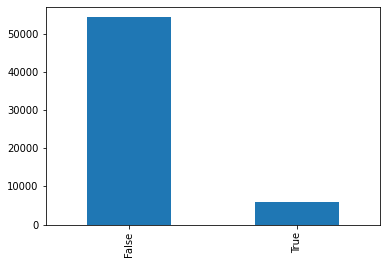

In [202]:
pd.value_counts(gosales['IS_TENT']).plot.bar()
plt.show()

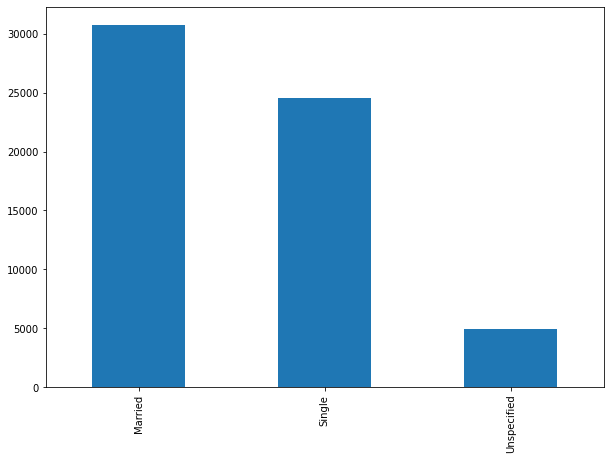

In [203]:
plt.figure(figsize=(10, 7))

pd.value_counts(gosales['MARITAL_STATUS']).plot.bar()

plt.show()

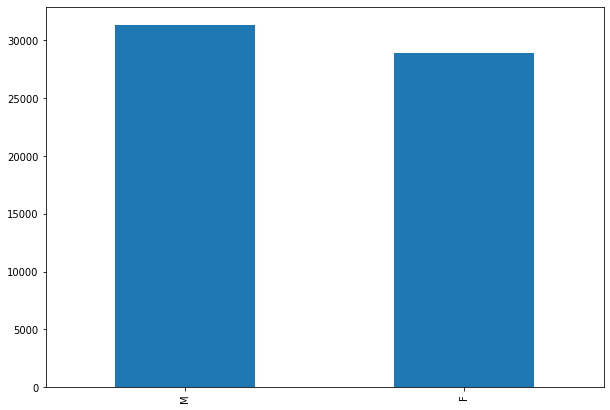

In [205]:
plt.figure(figsize=(10, 7))
pd.value_counts(gosales['GENDER']).plot.bar()
plt.show()

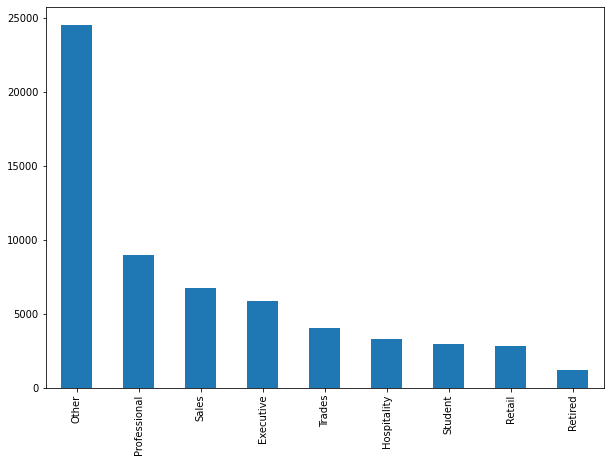

In [206]:
plt.figure(figsize=(10, 7))
pd.value_counts(gosales['PROFESSION']).plot.bar()
plt.show()

In [207]:
gender = ['M', 'F']

In [208]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()

label_encoding = label_encoding.fit(gender)

In [214]:
gosales['GENDER'] = label_encoding.transform(gosales['GENDER'].astype(str))

In [215]:
label_encoding.classes_

array(['F', 'M'], dtype='<U1')

In [217]:
gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
45639,False,1,56,Married,Trades
17376,False,0,41,Married,Other
48443,False,0,19,Single,Other
10089,False,1,53,Married,Other
36385,False,0,41,Married,Other
29437,False,0,34,Married,Executive
24176,False,0,21,Married,Other
36077,False,0,43,Married,Other
28023,False,0,46,Married,Executive
47656,True,1,28,Single,Trades


In [218]:
gosales[['MARITAL_STATUS']].sample(5)

,MARITAL_STATUS
22684,Married
45737,Single
12145,Single
43261,Single
21331,Single


In [219]:
  one_hot_encoding = preprocessing.OneHotEncoder()

  one_hot_encoding = one_hot_encoding.fit(gosales['MARITAL_STATUS'].values.reshape(-1, 1))

In [220]:
one_hot_encoding.categories_

[array(['Married', 'Single', 'Unspecified'], dtype=object)]

In [221]:
one_hot_labels = one_hot_encoding.transform(gosales['MARITAL_STATUS'].values.reshape(-1, 1)).toarray()

one_hot_labels

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [222]:
labels_df = pd.DataFrame()

labels_df['MARITAL_STATUS_Married'] = one_hot_labels[:,0]
labels_df['MARITAL_STATUS_Single'] = one_hot_labels[:,1]
labels_df['MARITAL_STATUS_Unspecified'] = one_hot_labels[:,2]

labels_df.head()

,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [223]:
encoded_df = pd.concat([gosales, labels_df], axis=1)
encoded_df.drop('MARITAL_STATUS', axis=1, inplace=True)

In [224]:
encoded_df.sample(10)

,IS_TENT,GENDER,AGE,PROFESSION,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified
39743,False,1,38,Sales,1.0,0.0,0.0
51175,False,1,19,Executive,0.0,1.0,0.0
37715,False,0,23,Retail,1.0,0.0,0.0
2520,False,0,46,Hospitality,0.0,0.0,1.0
39311,False,0,58,Retired,1.0,0.0,0.0
16004,True,0,45,Hospitality,0.0,0.0,1.0
29029,False,0,42,Other,1.0,0.0,0.0
8557,False,0,48,Professional,1.0,0.0,0.0
23683,True,1,21,Other,0.0,1.0,0.0
21948,True,0,24,Retail,0.0,1.0,0.0


In [225]:
gosales = pd.get_dummies(encoded_df, columns=['PROFESSION'])

gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified,PROFESSION_Executive,PROFESSION_Hospitality,PROFESSION_Other,PROFESSION_Professional,PROFESSION_Retail,PROFESSION_Retired,PROFESSION_Sales,PROFESSION_Student,PROFESSION_Trades
41195,False,0,29,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0
20036,False,0,38,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0
34216,False,1,38,0.0,1.0,0.0,0,0,0,1,0,0,0,0,0
48650,False,0,28,0.0,1.0,0.0,0,0,1,0,0,0,0,0,0
6372,False,0,32,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0
57902,False,0,46,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0
36355,False,1,29,0.0,1.0,0.0,0,0,0,0,0,0,0,0,1
54953,False,1,39,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1
28881,False,0,43,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0
21663,False,1,44,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0


In [226]:
gosales = pd.read_csv('GoSales_Tx_LogisticRegression.csv')

gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
46257,True,F,47,Married,Hospitality
24259,False,F,27,Single,Other
50086,False,F,29,Married,Other
20732,False,M,28,Single,Trades
24855,False,F,25,Single,Hospitality
38779,False,F,66,Married,Other
53853,False,F,24,Single,Other
21526,False,F,27,Single,Other
32506,True,M,27,Single,Professional
59865,False,M,28,Single,Other


In [227]:
gosales = pd.get_dummies(gosales)

gosales.sample(10)

,IS_TENT,AGE,GENDER_F,GENDER_M,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified,PROFESSION_Executive,PROFESSION_Hospitality,PROFESSION_Other,PROFESSION_Professional,PROFESSION_Retail,PROFESSION_Retired,PROFESSION_Sales,PROFESSION_Student,PROFESSION_Trades
24349,False,33,1,0,1,0,0,0,0,1,0,0,0,0,0,0
21895,True,32,0,1,0,1,0,0,0,0,1,0,0,0,0,0
19577,False,20,1,0,0,1,0,0,0,0,1,0,0,0,0,0
8037,False,30,1,0,1,0,0,0,0,1,0,0,0,0,0,0
44775,False,50,1,0,1,0,0,0,0,0,0,1,0,0,0,0
39024,False,25,0,1,0,1,0,0,0,0,0,0,0,1,0,0
40291,False,22,0,1,0,1,0,0,0,1,0,0,0,0,0,0
2174,False,58,0,1,1,0,0,0,0,0,0,0,0,0,0,1
5460,True,28,0,1,1,0,0,1,0,0,0,0,0,0,0,0
13224,False,26,0,1,0,1,0,0,0,1,0,0,0,0,0,0


##Discretization / Bucketization of Data

In [228]:
import pandas as pd
import numpy as np

In [229]:
X = np.array([-7, 2, -3, -11, 14, 6, 8])

In [230]:
categories = pd.cut(X, 4)

categories

[(-11.025, -4.75], (1.5, 7.75], (-4.75, 1.5], (-11.025, -4.75], (7.75, 14.0], (1.5, 7.75], (7.75, 14.0]]
Categories (4, interval[float64]): [(-11.025, -4.75] < (-4.75, 1.5] < (1.5, 7.75] < (7.75, 14.0]]

In [231]:
categories.categories

IntervalIndex([(-11.025, -4.75], (-4.75, 1.5], (1.5, 7.75], (7.75, 14.0]],
              closed='right',
              dtype='interval[float64]')

In [232]:
categories.codes

array([0, 2, 1, 0, 3, 2, 3], dtype=int8)

In [233]:
categories.ordered

True

In [234]:
pd.cut(X, 4, retbins=True)

([(-11.025, -4.75], (1.5, 7.75], (-4.75, 1.5], (-11.025, -4.75], (7.75, 14.0], (1.5, 7.75], (7.75, 14.0]]
 Categories (4, interval[float64]): [(-11.025, -4.75] < (-4.75, 1.5] < (1.5, 7.75] < (7.75, 14.0]],
 array([-11.025,  -4.75 ,   1.5  ,   7.75 ,  14.   ]))

In [235]:
marks = np.array([70, 20, 30, 99, 40, 16, 80])

In [236]:
categories, bins = pd.cut(marks, 4, retbins=True, labels=['poor', 'average', 'good', 'excellent'])

In [237]:
categories

['good', 'poor', 'poor', 'excellent', 'average', 'poor', 'excellent']
Categories (4, object): ['poor' < 'average' < 'good' < 'excellent']

In [238]:
from sklearn.preprocessing import KBinsDiscretizer

In [239]:
marks = [[70], [20], [30], [99], [40], [16], [80]]

In [240]:
enc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')

In [241]:
enc.fit(marks)

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='uniform')

In [242]:
enc.transform(marks)

array([[2.],
       [0.],
       [0.],
       [3.],
       [1.],
       [0.],
       [3.]])

In [243]:
enc.bin_edges_

array([array([16.  , 36.75, 57.5 , 78.25, 99.  ])], dtype=object)

In [248]:
X = [[-21, 41, -14],
     [-13, 23, -31],
     [  9, 30, -5],
     [  0, 24, -17]]

In [249]:
enc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')

In [250]:
enc.fit(X)

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='quantile')

In [252]:
X_trans = enc.transform(X)

X_trans

array([[0., 3., 2.],
       [1., 0., 0.],
       [3., 2., 3.],
       [2., 1., 1.]])

In [253]:
enc.bin_edges_

array([array([-21.  , -15.  ,  -6.5 ,   2.25,   9.  ]),
       array([23.  , 23.75, 27.  , 32.75, 41.  ]),
       array([-31.  , -20.5 , -15.5 , -11.75,  -5.  ])], dtype=object)

In [254]:
enc.inverse_transform(X_trans)

array([[-18.   ,  36.875, -13.625],
       [-10.75 ,  23.375, -25.75 ],
       [  5.625,  29.875,  -8.375],
       [ -2.125,  25.375, -18.   ]])

In [256]:
automobile_df = pd.read_csv('auto_mpg_processed.csv')

automobile_df.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,age
0,18.000000,8,307.0,130,3504,307.0,US,49
1,16.000000,8,304.0,150,3433,304.0,US,49
2,17.000000,8,302.0,140,3449,302.0,US,49
3,14.000000,8,454.0,220,4354,454.0,US,49
4,23.551429,8,440.0,215,4312,440.0,US,49
5,14.000000,8,455.0,225,4425,455.0,US,49
6,15.000000,8,390.0,190,3850,390.0,US,49
7,15.000000,8,383.0,170,3563,383.0,US,49
8,14.000000,5,340.0,160,3609,340.0,US,49
9,23.551429,8,400.0,150,3761,400.0,US,49


In [258]:
X = automobile_df[['Horsepower']]
Y = automobile_df['MPG']

In [259]:
X.sample(10)

,Horsepower
342,74
121,80
8,160
341,65
364,74
17,87
353,105
206,150
356,88
350,116


In [260]:
import matplotlib.pyplot as plt

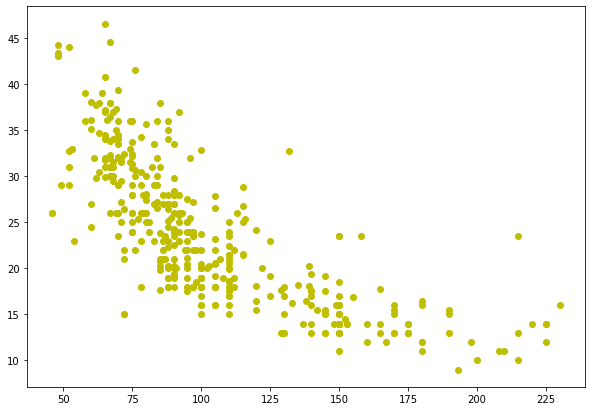

In [261]:
plt.figure(figsize=(10, 7))

plt.plot(X, Y, 'o', c='y')
plt.show()

In [262]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [263]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [264]:
reg = LinearRegression().fit(x_train, y_train)

In [265]:
y_pred = reg.predict(x_test)

y_pred

array([26.513, 29.534, 24.923, 27.308, 25.877, 25.082, 28.262, 25.877,
        5.209, 19.041, 29.534, 27.785, 26.99 , 26.195, 28.739, 26.195,
       17.928, 25.877, 26.672, 25.082, 29.534, 23.492, 17.133, 24.287,
       29.534, 25.082, 24.287, 26.354, 31.919, 16.338, 23.492,  9.979,
       29.057,  6.004, 13.635, 19.677, 27.785, 29.057, 16.338, 22.698,
       25.877, 26.831, 25.559, 27.467, 25.559, 26.831, 22.38 , 22.698,
       21.903,  6.004, 24.287, 30.647, 12.364, 17.928, 24.287, 25.082,
       29.057, 30.647, 21.108, 31.919, 16.338, 25.877, 11.569, 22.698,
       23.969, 26.036, 18.723, 17.133, 26.99 , 20.79 , 17.61 , 16.338,
       12.364, 22.698, 28.898, 26.195, 29.693, 29.057])

In [266]:
from sklearn.metrics import r2_score

In [269]:
r2_score(y_test, y_pred)

0.5331072604865587

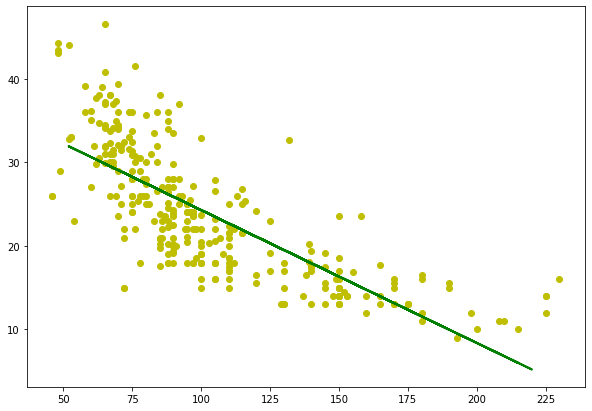

In [272]:
plt.figure(figsize=(10, 7))

plt.plot(x_train, y_train, 'o', c='y')

plt.plot(x_test, y_pred, linewidth=2, color='green', linestyle='-', label='linear regression')

plt.show()

In [273]:
enc = KBinsDiscretizer(n_bins=20, encode='ordinal')

x_binned = enc.fit_transform(x_train)

In [274]:
x_binned[:10]

array([[14.],
       [14.],
       [19.],
       [14.],
       [17.],
       [19.],
       [ 5.],
       [ 7.],
       [14.],
       [19.]])

In [275]:
x_test_binned = enc.transform(x_test)

In [276]:
reg = LinearRegression().fit(x_binned, y_train)

In [277]:
y_pred = reg.predict(x_test_binned)

y_pred

array([26.822, 32.445, 22.324, 27.947, 24.573, 23.448, 29.071, 24.573,
       13.327, 17.825, 32.445, 29.071, 27.947, 25.698, 30.196, 25.698,
       16.701, 24.573, 26.822, 23.448, 32.445, 20.075, 16.701, 21.199,
       32.445, 23.448, 21.199, 26.822, 34.694, 15.576, 20.075, 13.327,
       31.321, 13.327, 14.452, 17.825, 29.071, 31.321, 15.576, 18.95 ,
       24.573, 26.822, 23.448, 27.947, 23.448, 26.822, 18.95 , 18.95 ,
       18.95 , 13.327, 21.199, 34.694, 14.452, 16.701, 21.199, 23.448,
       31.321, 34.694, 17.825, 34.694, 15.576, 24.573, 13.327, 18.95 ,
       21.199, 25.698, 17.825, 16.701, 27.947, 17.825, 16.701, 15.576,
       14.452, 18.95 , 30.196, 25.698, 32.445, 31.321])

In [278]:
r2_score(y_test, y_pred)

0.6740132943434065

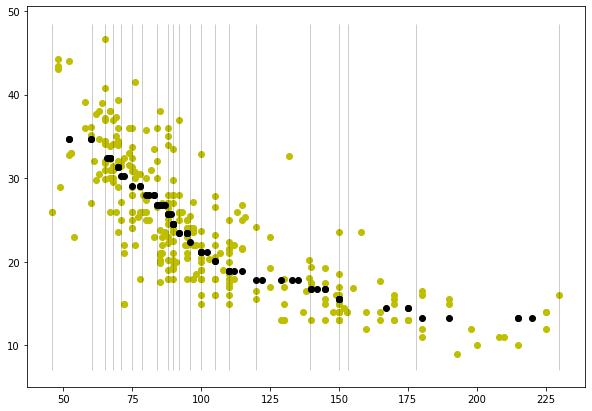

In [279]:
plt.figure(figsize=(10, 7))

plt.scatter(x_train, y_train, c='y')
plt.scatter(x_test, y_pred, color='k')

plt.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)

plt.show()